In [108]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense ,AveragePooling2D,GlobalAveragePooling2D


In [3]:
dataset_path = r'C:\Users\ARYA\Desktop\NITK Machine learning\dog_bike_cat'
img_size = (150, 150)
batch_size = 32


In [5]:
# Data Augmentation and Rescaling
train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Load train and validation data
train_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_data = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 20000 images belonging to 4 classes.
Found 5000 images belonging to 4 classes.


In [6]:
# Define the CNN model
model = Sequential([
    # First
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Second 
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    # Fully Connected Layer
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes: dogs, cats, bikes, cars
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\ARYA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,308,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,328,132 (20.33 MB)

 Trainable params: 5,328,132 (20.33 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=2  
)


Epoch 1/2


C:\Users\ARYA\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 581s 912ms/step - accuracy: 0.6460 - loss: 0.8674 - val_accuracy: 0.8400 - val_loss: 0.4077
Epoch 2/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 195s 311ms/step - accuracy: 0.8887 - loss: 0.2860 - val_accuracy: 0.8832 - val_loss: 0.2964


In [45]:
model_1=Sequential()
model_1.add(Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)))
model_1.add(MaxPooling2D(pool_size=(3, 3)))
model_1.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Flatten())
model_1.add(Dense(32,activation='relu'))
model_1.add(Dense(4,activation='softmax'))

In [47]:
model_1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 47, 47, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │       541,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 546,948 (2.09 MB)

 Trainable params: 546,948 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1=model_1.fit(train_data,validation_data=validation_data,epochs=10,batch_size=128)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 206ms/step - accuracy: 0.5989 - loss: 0.8440 - val_accuracy: 0.8674 - val_loss: 0.3446
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 205ms/step - accuracy: 0.8792 - loss: 0.3129 - val_accuracy: 0.8904 - val_loss: 0.2791
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 207ms/step - accuracy: 0.9121 - loss: 0.2294 - val_accuracy: 0.8968 - val_loss: 0.2649
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 207ms/step - accuracy: 0.9310 - loss: 0.1805 - val_accuracy: 0.9056 - val_loss: 0.2547
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 205ms/step - accuracy: 0.9456 - loss: 0.1495 - val_accuracy: 0.9046 - val_loss: 0.2650
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 207ms/step - accuracy: 0.9531 - loss: 0.1257 - val_accuracy: 0.9046 - val_loss: 0.2574
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 136s 216ms/step - accuracy: 0.9619 - loss: 0.1047 - val_accuracy: 0.9036 - val_loss: 0.2980
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 212ms/step - accuracy: 0.9689 -

In [50]:
model_2=Sequential()
model_2.add(Conv2D(16,(3,3),activation='sigmoid',input_shape=(150,150,3)))
model_2.add(MaxPooling2D(pool_size=(3, 3)))
model_2.add(Conv2D(32,(3,3),activation='sigmoid',input_shape=(150,150,3)))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(32,activation='relu'))
model_2.add(Dense(4,activation='softmax'))
model_2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_2=model_2.fit(train_data,validation_data=validation_data,epochs=5)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 135s 210ms/step - accuracy: 0.3963 - loss: 1.2246 - val_accuracy: 0.4000 - val_loss: 1.1957
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4187s 7s/step - accuracy: 0.4008 - loss: 1.2005 - val_accuracy: 0.4000 - val_loss: 1.1939
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 211ms/step - accuracy: 0.3956 - loss: 1.1890 - val_accuracy: 0.4000 - val_loss: 1.1973
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 133s 211ms/step - accuracy: 0.3954 - loss: 1.2015 - val_accuracy: 0.4000 - val_loss: 1.1977
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 212ms/step - accuracy: 0.4032 - loss: 1.1958 - val_accuracy: 0.4000 - val_loss: 1.1917


In [51]:
model_3=Sequential()
model_3.add(Conv2D(32,(3,3),activation='sigmoid',input_shape=(150,150,3)))
model_3.add(MaxPooling2D(pool_size=(3, 3)))
model_3.add(Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Conv2D(8,(3,3),activation='relu',input_shape=(150,150,3)))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Flatten())
model_3.add(Dense(64,activation='relu'))
model_3.add(Dense(4,activation='softmax'))
model_3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_3=model_3.fit(train_data,validation_data=validation_data,epochs=5)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 155s 242ms/step - accuracy: 0.4265 - loss: 1.1874 - val_accuracy: 0.4958 - val_loss: 1.0768
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 234ms/step - accuracy: 0.5119 - loss: 1.0584 - val_accuracy: 0.5088 - val_loss: 1.0357
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 147s 234ms/step - accuracy: 0.5615 - loss: 0.9627 - val_accuracy: 0.6138 - val_loss: 0.8727
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 227ms/step - accuracy: 0.6140 - loss: 0.8570 - val_accuracy: 0.6568 - val_loss: 0.7740
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 218ms/step - accuracy: 0.6682 - loss: 0.7533 - val_accuracy: 0.6804 - val_loss: 0.7150


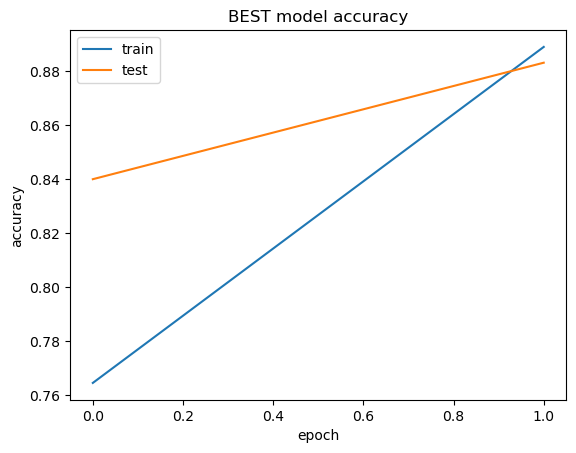

In [71]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

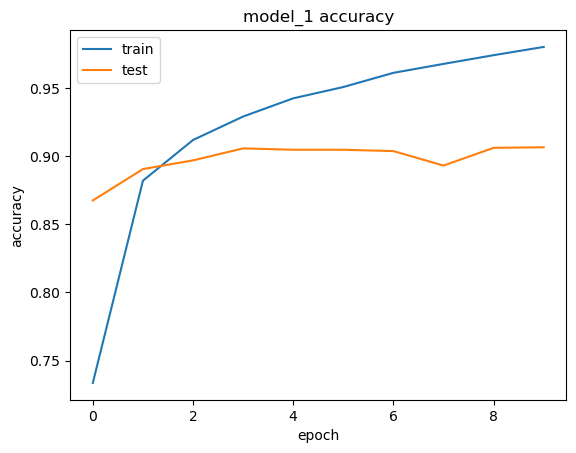

In [69]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model_1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

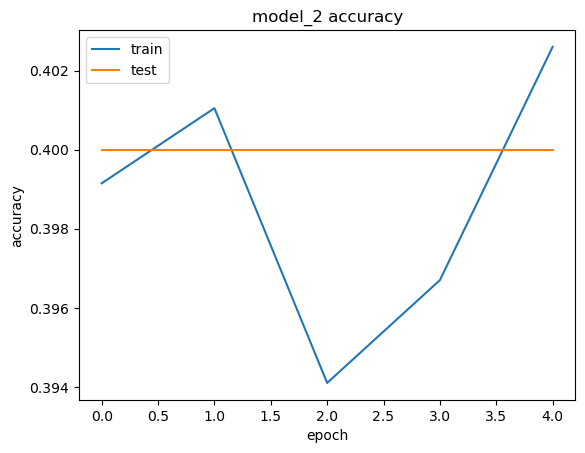

In [67]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model_2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

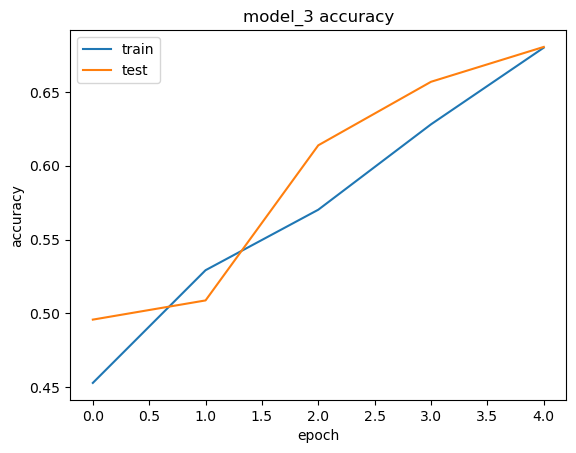

In [65]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model_3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [73]:
#Experiment the three different architectures with,  "change the Filter size (3 filters), Number of filters (3 different numbers) , 
#Stride size (0,1,2) and different pooling size. (Find a different pooling technique from the literature and use it)
#make very simple models as training is taking lot of time

In [79]:

model_11 = Sequential()
model_11.add(Conv2D(8, (3, 3), activation='relu', input_shape=(150, 150, 3), strides=(2,2))) 
model_11.add(MaxPooling2D((2, 2)))  
model_11.add(Flatten())
model_11.add(Dense(32, activation='relu'))  
model_11.add(Dense(4, activation='softmax'))  

model_11.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_11.summary()


C:\Users\ARYA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 74, 74, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 37, 37, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 10952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │       350,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 350,852 (1.34 MB)

 Trainable params: 350,852 (1.34 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
history_11=model_11.fit(train_data,validation_data=validation_data,epochs=5,batch_size=32)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 187ms/step - accuracy: 0.7753 - loss: 0.5692 - val_accuracy: 0.7932 - val_loss: 0.5007
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 184ms/step - accuracy: 0.8313 - loss: 0.4348 - val_accuracy: 0.8028 - val_loss: 0.4908
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 185ms/step - accuracy: 0.8576 - loss: 0.3713 - val_accuracy: 0.8084 - val_loss: 0.4621
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 182ms/step - accuracy: 0.8755 - loss: 0.3191 - val_accuracy: 0.8066 - val_loss: 0.4795
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 180ms/step - accuracy: 0.8909 - loss: 0.2828 - val_accuracy: 0.8030 - val_loss: 0.5201


In [105]:
# Define Simple Model 2
model_22 = Sequential()
model_22.add(Conv2D(16, (5, 5), activation='relu', input_shape=(150, 150, 3), strides=2))  # 16 filters of size 5x5
model_22.add(AveragePooling2D((2, 2)))  # Average pooling with 2x2 window
model_22.add(Flatten())
model_22.add(Dense(32, activation='relu'))  # Dense layer with 32 units
model_22.add(Dense(4, activation='softmax'))  # Output layer for 4 classes

model_22.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_22.summary()


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 73, 73, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 36, 36, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 20736)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │       663,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 664,932 (2.54 MB)

 Trainable params: 664,932 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
history_22=model_22.fit(train_data,validation_data=validation_data,epochs=4,batch_size=16)

Epoch 1/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 190ms/step - accuracy: 0.5777 - loss: 0.9532 - val_accuracy: 0.7892 - val_loss: 0.5250
Epoch 2/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 187ms/step - accuracy: 0.8531 - loss: 0.3909 - val_accuracy: 0.8264 - val_loss: 0.4625
Epoch 3/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 119s 189ms/step - accuracy: 0.8899 - loss: 0.2904 - val_accuracy: 0.8440 - val_loss: 0.4059
Epoch 4/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 188ms/step - accuracy: 0.9206 - loss: 0.2209 - val_accuracy: 0.8518 - val_loss: 0.3861


In [111]:
model_33 = Sequential()
model_33.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3), strides=(4,4)) ) 
model_33.add(GlobalAveragePooling2D())  
model_33.add(Dense(32, activation='relu')) 
model_33.add(Dense(4, activation='softmax'))  

model_33.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_33.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 37, 37, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,004 (15.64 KB)

 Trainable params: 4,004 (15.64 KB)

 Non-trainable params: 0 (0.00 B)

In [115]:
history_33=model_33.fit(train_data,validation_data=validation_data,epochs=4,batch_size=16)

Epoch 1/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 183ms/step - accuracy: 0.4373 - loss: 1.1901 - val_accuracy: 0.4538 - val_loss: 1.1138
Epoch 2/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 180ms/step - accuracy: 0.4534 - loss: 1.1087 - val_accuracy: 0.4626 - val_loss: 1.0764
Epoch 3/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 181ms/step - accuracy: 0.4649 - loss: 1.0747 - val_accuracy: 0.4776 - val_loss: 1.0471
Epoch 4/4
625/625 ━━━━━━━━━━━━━━━━━━━━ 184s 294ms/step - accuracy: 0.4940 - loss: 1.0367 - val_accuracy: 0.5242 - val_loss: 1.0219


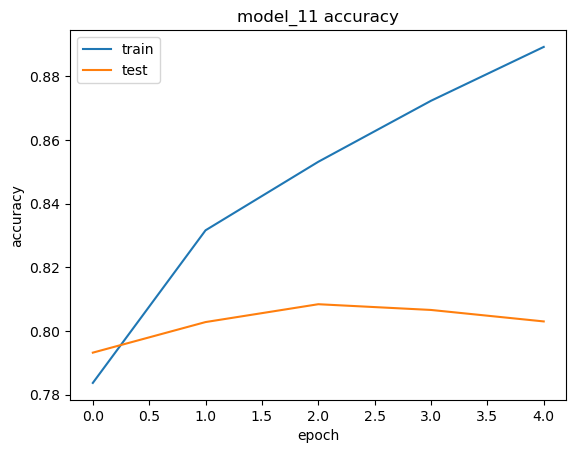

In [117]:
plt.plot(history_11.history['accuracy'])
plt.plot(history_11.history['val_accuracy'])
plt.title('model_11 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

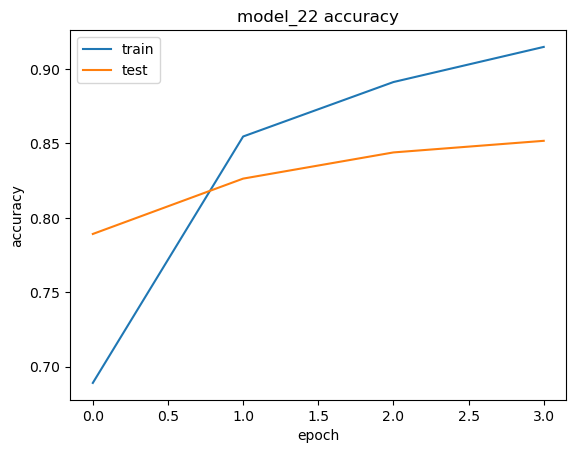

In [119]:
plt.plot(history_22.history['accuracy'])
plt.plot(history_22.history['val_accuracy'])
plt.title('model_22 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

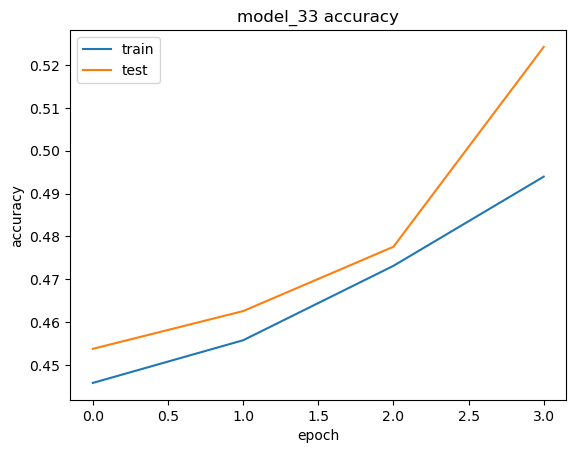

In [123]:
plt.plot(history_33.history['accuracy'])
plt.plot(history_33.history['val_accuracy'])
plt.title('model_33 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()